In [ ]:
#Developer Impact on Properties
#Analyze how different developers influence property pricing, luxury classification, and amenity richness. Compare top developers in Mumbai and Thane, and highlight patterns in their offerings.


In [1]:
# Core libraries
import pandas as pd
import numpy as np

# Visualization libraries
import matplotlib.pyplot as plt
import seaborn as sns

# Optional: Set Seaborn style for cleaner plots
sns.set(style='whitegrid')

%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

In [2]:
import pandas as pd

# Load the cleaned dataset
df = pd.read_csv('C:/Users/bvgpo/Desktop/IIIT_HYDERABAD/Sem2/DA/A1/cleaned_real_estate_data.csv')

In [3]:
top_developers = df[df['city'].isin(['Mumbai', 'Thane'])]['developer'].value_counts().nlargest(5).index
top_dev_df = df[df['developer'].isin(top_developers) & df['city'].isin(['Mumbai', 'Thane'])]

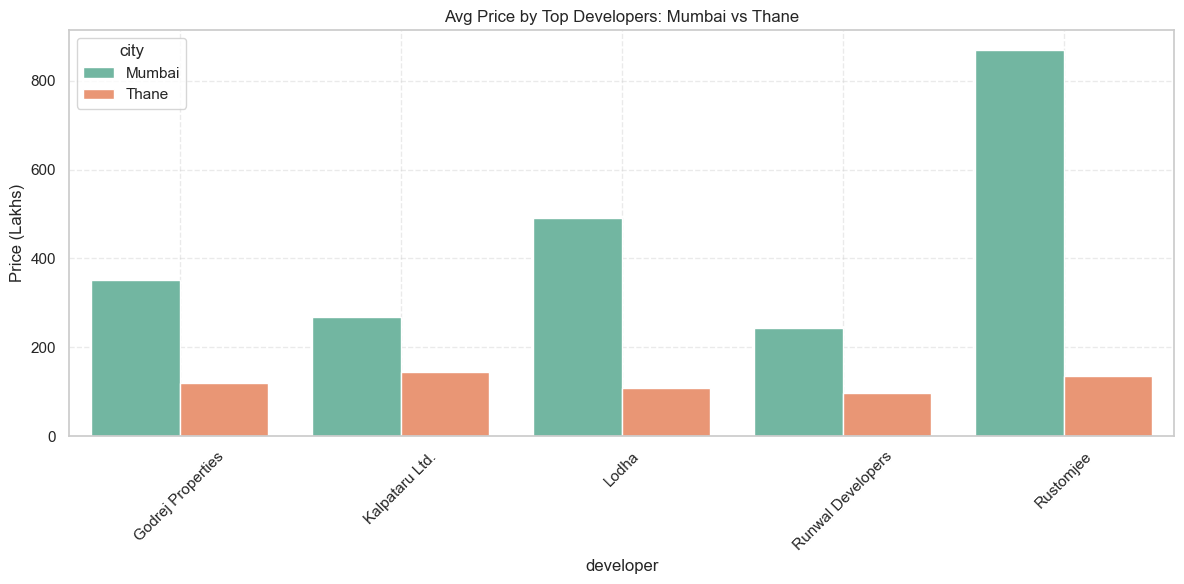

In [4]:
price_by_dev = top_dev_df.groupby(['city', 'developer'])['price_lakhs'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='developer', y='price_lakhs', hue='city', data=price_by_dev, palette='Set2')
plt.title('Avg Price by Top Developers: Mumbai vs Thane')
plt.ylabel('Price (Lakhs)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

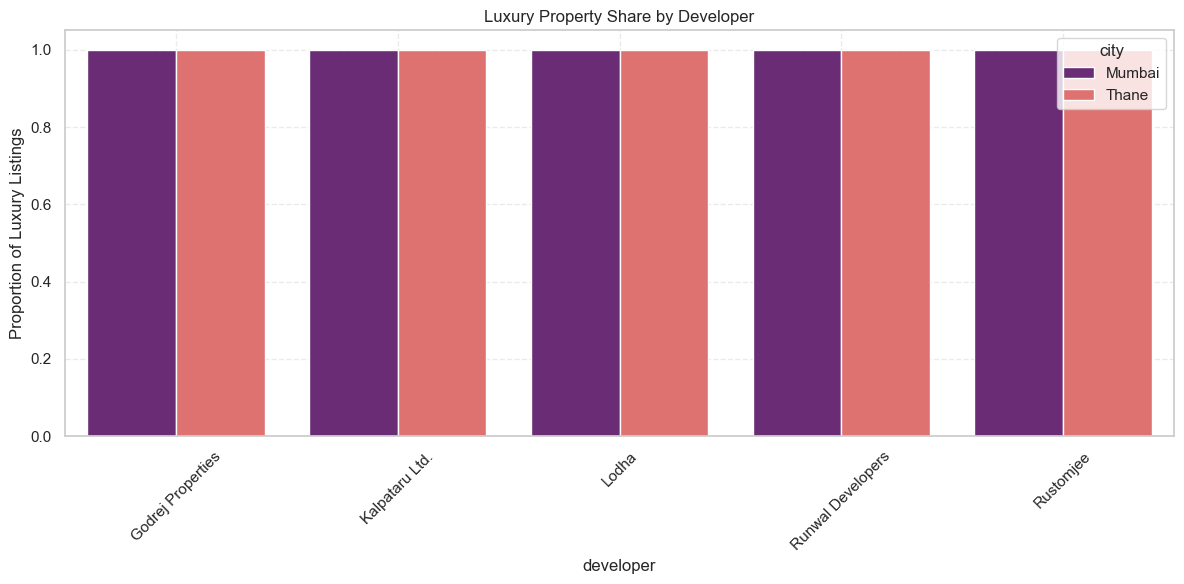

In [5]:
luxury_by_dev = top_dev_df.groupby(['city', 'developer'])['is_luxury'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='developer', y='is_luxury', hue='city', data=luxury_by_dev, palette='magma')
plt.title('Luxury Property Share by Developer')
plt.ylabel('Proportion of Luxury Listings')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

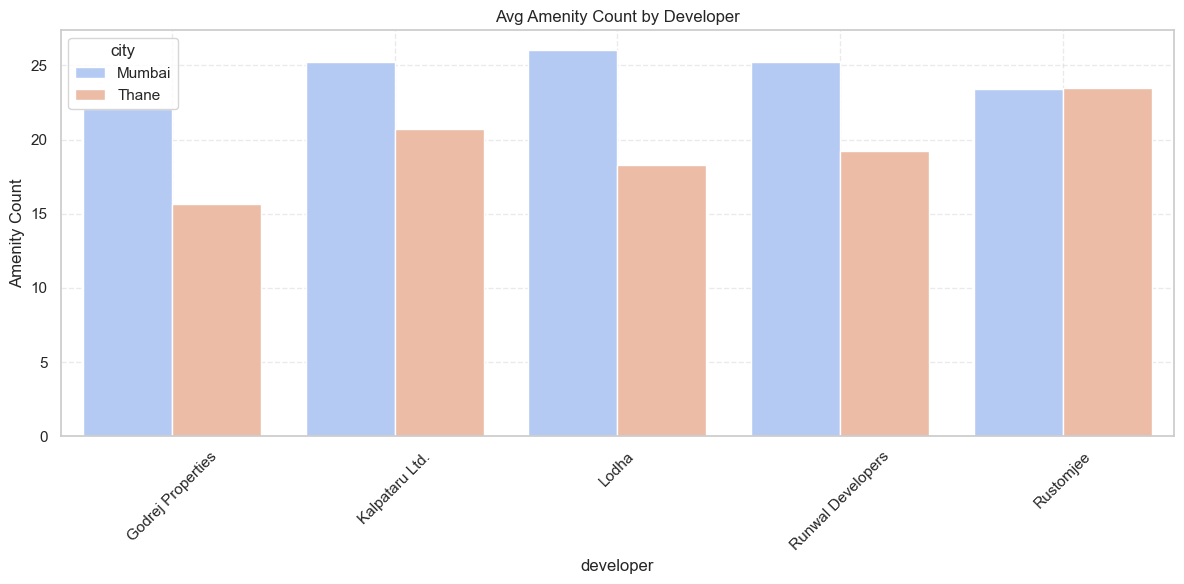

In [6]:
#compare amenity richness by developer
amenity_by_dev = top_dev_df.groupby(['city', 'developer'])['amenity_count'].mean().reset_index()

plt.figure(figsize=(12, 6))
sns.barplot(x='developer', y='amenity_count', hue='city', data=amenity_by_dev, palette='coolwarm')
plt.title('Avg Amenity Count by Developer')
plt.ylabel('Amenity Count')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

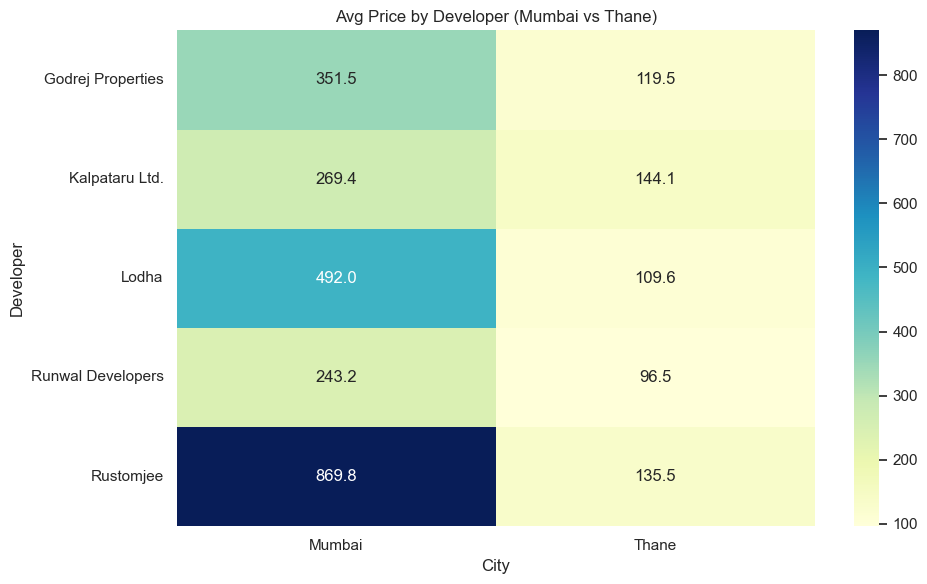

In [7]:
#
# Prepare data
heatmap_data = top_dev_df.groupby(['developer', 'city']).agg({
    'price_lakhs': 'mean',
    'is_luxury': 'mean',
    'amenity_count': 'mean'
}).round(2).reset_index()

# Pivot for heatmap
heatmap_pivot = heatmap_data.pivot(index='developer', columns='city')

# Plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(heatmap_pivot['price_lakhs'], annot=True, cmap='YlGnBu', fmt='.1f')
plt.title('Avg Price by Developer (Mumbai vs Thane)')
plt.xlabel('City')
plt.ylabel('Developer')
plt.tight_layout()
plt.show()

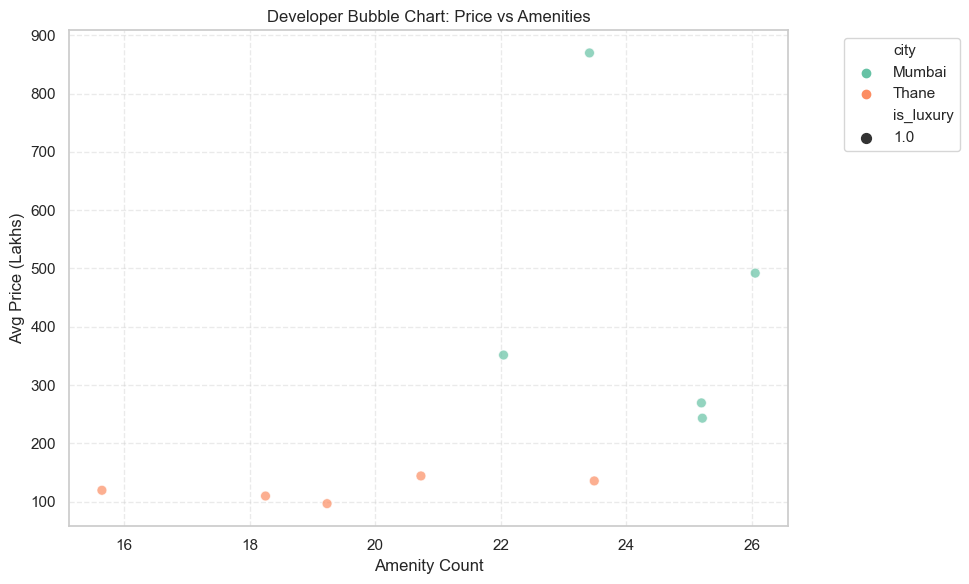

In [8]:
#bubble chart
bubble_data = top_dev_df.groupby(['developer', 'city']).agg({
    'price_lakhs': 'mean',
    'amenity_count': 'mean',
    'is_luxury': 'mean'
}).reset_index()

plt.figure(figsize=(10, 6))
sns.scatterplot(
    x='amenity_count', y='price_lakhs',
    size='is_luxury', hue='city',
    data=bubble_data, sizes=(50, 300), palette='Set2', alpha=0.7
)
plt.title('Developer Bubble Chart: Price vs Amenities')
plt.xlabel('Amenity Count')
plt.ylabel('Avg Price (Lakhs)')
plt.legend(loc='upper right', bbox_to_anchor=(1.25, 1))
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()

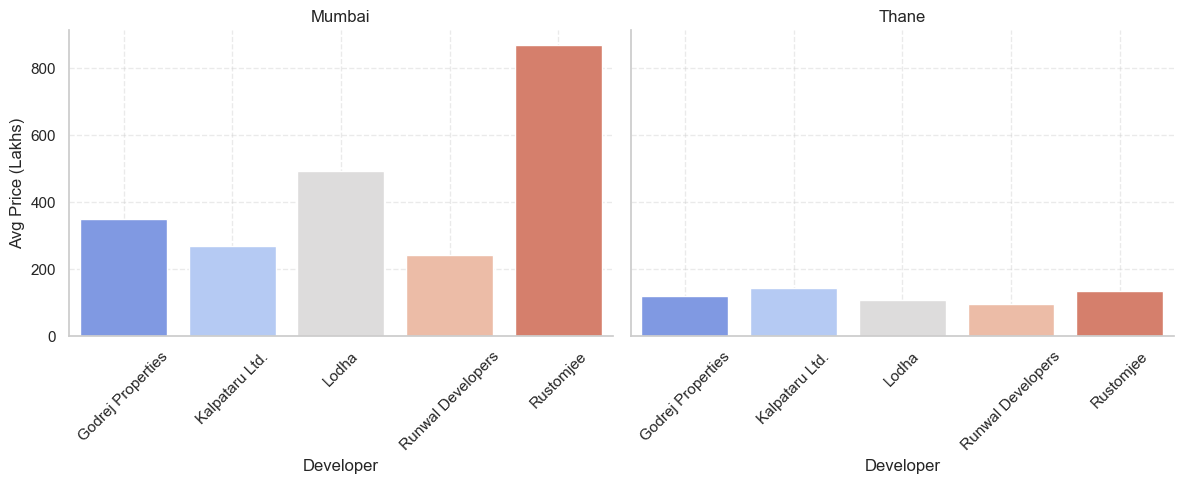

In [10]:
#facet grid

facet_data = top_dev_df.groupby(['developer', 'city']).agg({
    'price_lakhs': 'mean',
    'amenity_count': 'mean'
}).reset_index()

g = sns.FacetGrid(facet_data, col='city', height=5, aspect=1.2)
g.map_dataframe(sns.barplot, x='developer', y='price_lakhs', palette='coolwarm')
g.set_titles("{col_name}")
g.set_axis_labels("Developer", "Avg Price (Lakhs)")
for ax in g.axes.flat:
    ax.set_xticklabels(ax.get_xticklabels(), rotation=45)
    ax.grid(True, linestyle='--', alpha=0.4)

plt.tight_layout()
plt.show()

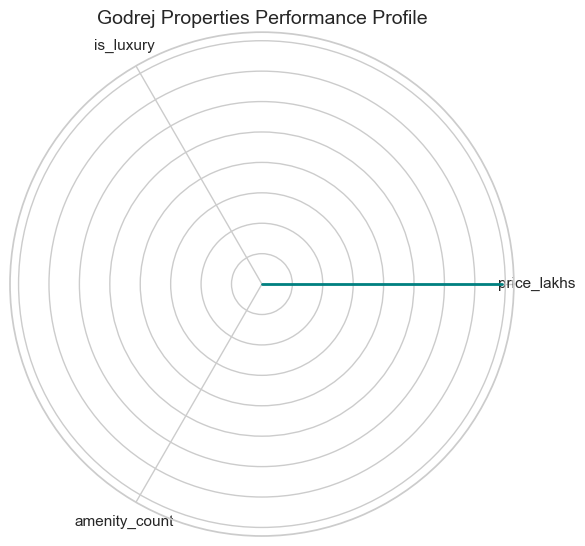

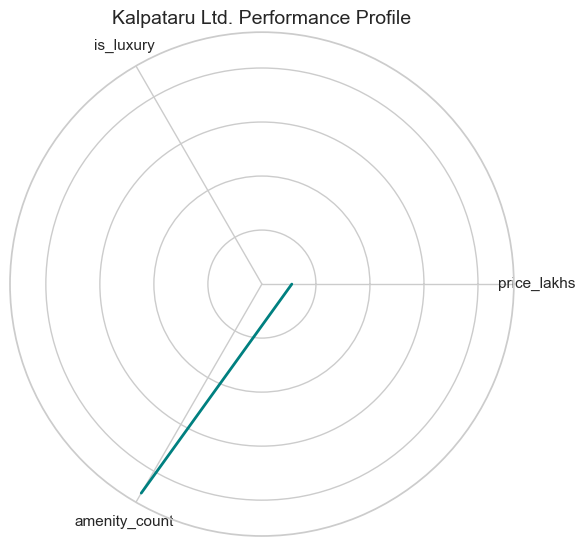

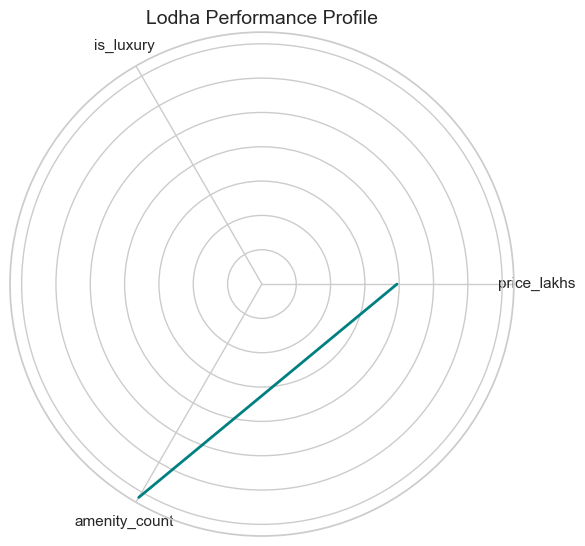

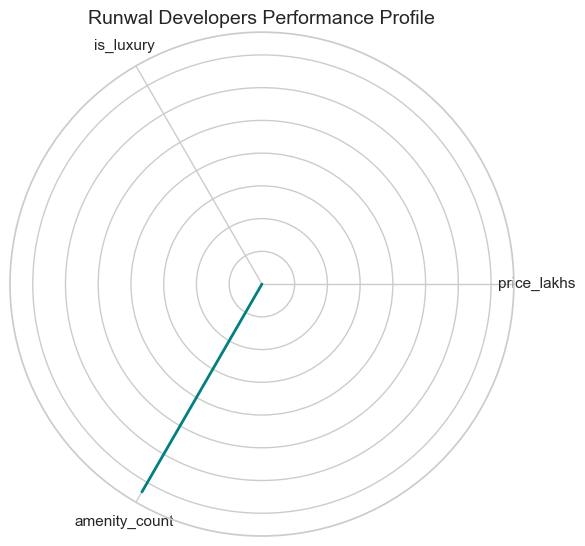

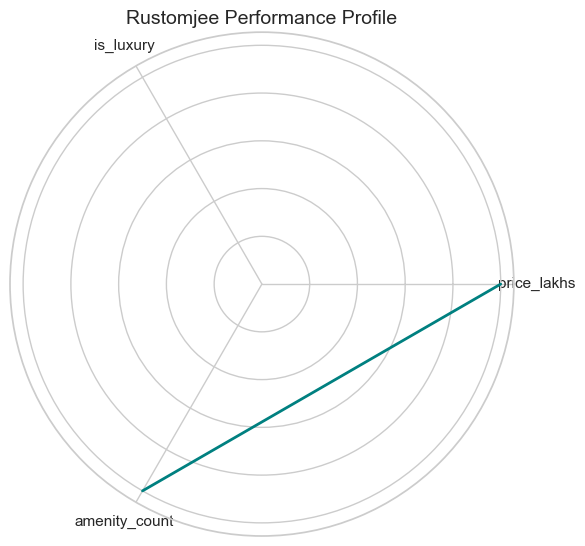

In [12]:
#additional insights

#developer performance accross metrics

# Normalize metrics for radar chart
radar_data = dev_metrics.groupby('developer')[['price_lakhs', 'is_luxury', 'amenity_count']].mean()
radar_data = (radar_data - radar_data.min()) / (radar_data.max() - radar_data.min())

# Plot radar chart for each developer
import numpy as np

labels = radar_data.columns
num_vars = len(labels)

for dev in radar_data.index:
    values = radar_data.loc[dev].values
    angles = np.linspace(0, 2 * np.pi, num_vars, endpoint=False).tolist()
    values = np.concatenate((values, [values[0]]))
    angles += [angles[0]]

    fig, ax = plt.subplots(figsize=(6, 6), subplot_kw=dict(polar=True))
    ax.plot(angles, values, color='teal', linewidth=2)
    ax.fill(angles, values, color='teal', alpha=0.25)
    ax.set_title(f'{dev} Performance Profile', size=14)
    ax.set_xticks(angles[:-1])
    ax.set_xticklabels(labels)
    ax.set_yticklabels([])
    plt.tight_layout()
    plt.show()

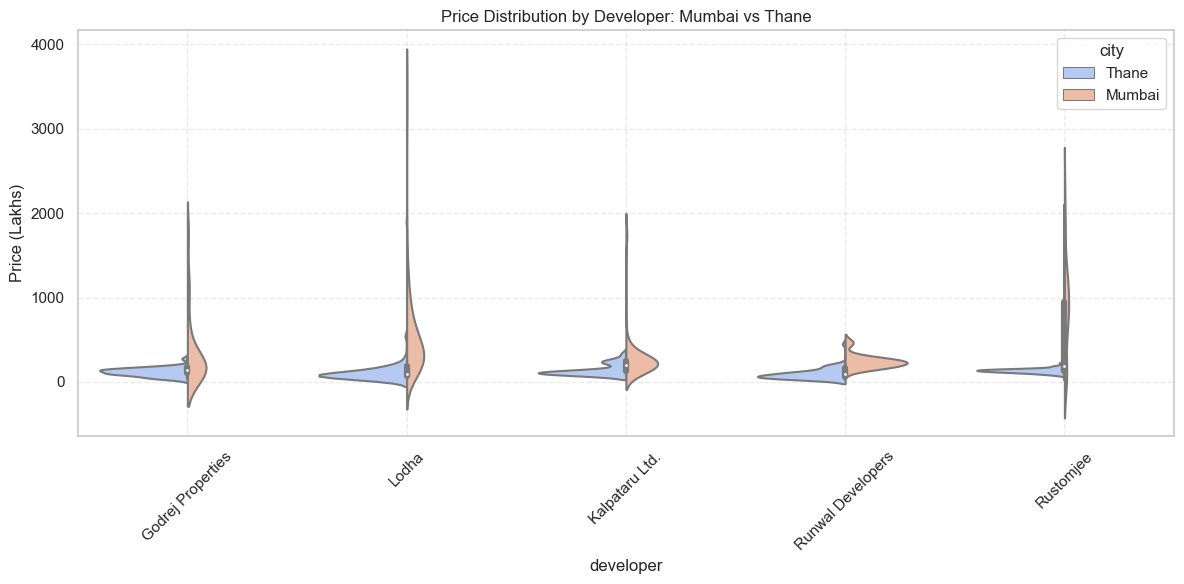

In [13]:
#price distribution by developer
plt.figure(figsize=(12, 6))
sns.violinplot(x='developer', y='price_lakhs', hue='city', data=top_dev_df, split=True, palette='coolwarm')
plt.title('Price Distribution by Developer: Mumbai vs Thane')
plt.ylabel('Price (Lakhs)')
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.4)
plt.tight_layout()
plt.show()